<a href="https://colab.research.google.com/github/Gaurav1401/Deep-Learning/blob/main/Practice/Implementation%20of%20Keras/Keras_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workflow to use Keras**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


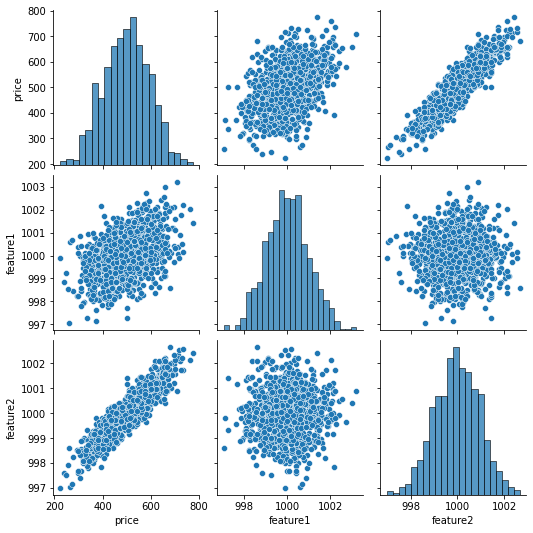

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [58]:
X = df[['feature1', 'feature2']]
y = df['price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [60]:
y_train.shape, y_test.shape

((700,), (300,))

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [64]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**One way to create a Neural Network model is**

In [67]:
# model = Sequential([Dense(4, activation='relu'),
#                     Dense(2, activation ='relu'),
#                     Dense(1)])

**A better way to make neural network model**

In [68]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss = 'mse')
# Since, it is a regression problem, so using mse as loss function

In [69]:
model.fit(X_train, y_train, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256562.6250
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256457.6719
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256347.3438
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256222.6719
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256083.7500
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255928.4375
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255755.7500
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255565.2188
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255356.1875
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255127.9062
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254877.0781
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

**PLotting the trend of loss with epochs**

In [70]:
loss_df = pd.DataFrame(model.history.history)

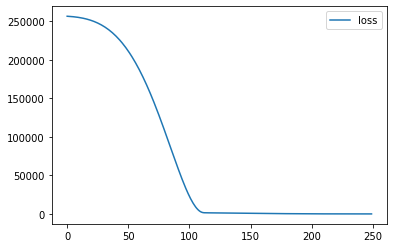

In [71]:
loss_df.plot()

**After the particular number of epochs the loss becomes constant**

### **Evaluating the model**

In [72]:
model.evaluate(X_test, y_test, verbose = 0)

25.706890106201172

In [81]:
model.evaluate(X_train, y_train, verbose = 0)

24.86236572265625

In [73]:
test_predictions = model.predict(X_test)

In [74]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [86]:
test_predictions

0      405.832275
1      622.313721
2      590.983582
3      571.819885
4      368.244995
          ...    
295    528.929565
296    516.243530
297    608.450745
298    417.039948
299    411.668915
Length: 300, dtype: float32

In [87]:
pred_df = pd.DataFrame(y_test)
pred_df.columns = ['Test True Y']

In [90]:
pred_df = pred_df.reset_index()
pred_df.drop('index', axis = 'columns', inplace = True)

In [91]:
pred_df.head()

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [92]:
pred_df = pd.concat([pred_df, test_predictions], axis = 'columns')

In [93]:
pred_df.head()

,Test True Y,0
0,402.296319,405.832275
1,624.156198,622.313721
2,582.455066,590.983582
3,578.588606,571.819885
4,371.224104,368.244995


In [94]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [95]:
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,405.832275
1,624.156198,622.313721
2,582.455066,590.983582
3,578.588606,571.819885
4,371.224104,368.244995


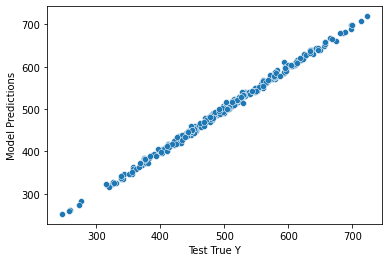

In [96]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data = pred_df)

**Let's try to evaluate the model based on other metrics**

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.103357500528065

In [100]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


**So, here we can see that standard deviation is 93 and the mean absolute error is 4.1, it means our model is performing really great.**

In [101]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.706894038158705

In [103]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5 # RMSE

5.070196646892377

## **Saving and Loading model**

In [104]:
from tensorflow.keras.models import load_model

In [105]:
model.save('my_gem_model.h5')

In [106]:
later_model = load_model('my_gem_model.h5')

In [107]:
later_model

**It will just work as my original model**